# Perform density-based clustering on real-world data (shopping-data.csv).

In [24]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import DBSCAN


In [25]:
# reading the data from shopping-data.csv

sh_data = pd.read_csv("shopping-data.csv")
sh_data.info()
print(sh_data.head())

x_data = sh_data.iloc[:, [2, 3, 4]].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


target  dbscan_cluster
Female   0                86
         1                19
        -1                 7
Male     0                65
         1                16
        -1                 7
Name: dbscan_cluster, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

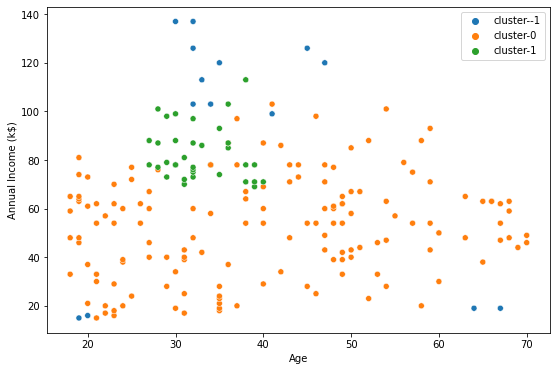

In [40]:
# Remove first two columns from dataframe(CustomerID,Genre)
sh_DBS = sh_data.iloc[ : , 2:]

#DBSCAN clustering
#eps : the furthest distance at which a point will pick its neighbours.
#I.e. this will decide how many neighbours a point will discover.
dbscan = DBSCAN(eps=14, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(sh_DBS)

sh_DBS['dbscan_cluster'] = dbscan_labels
sh_DBS['target'] = sh_data.Genre
sh_result = sh_DBS.groupby(['target'])['dbscan_cluster'].value_counts()

print(sh_result)
#Result: 
#DBSCAN clustering is evaluated against the target groups
#2 clusters were identified, denoted by 0 and 1
#-1 means noisy data (outliers)

#Visualizing DBSCAN clusters
fig = plt.figure(figsize=(9, 6))
sns.scatterplot(x="Age",y="Annual Income (k$)", data=sh_DBS, hue=['cluster-{}'.format(x) for x in dbscan_labels])